# Water Quality Solution

### Data Cleaning

In [7]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#Importing dataset

df = pd.read_csv("water_data.csv")
df.head()

Station_Code                                       Station_Name  \
0          4358  RIVER GOWTHAMI (GODAVARI) GOVALANKA, INJARAM (...   
1          1448     NAGAVALI AT THOTAPALLI REGULATOR, VIZIANAGARAM   
2          4346  RIVER NAGAVALI NEAR NH- 16 BRIDGE,\nUPSTREAM (...   
3          4347  RIVER NAGAVALI NEAR WATER PUMP HOUSE (KILLIPAL...   
4          4348  RIVER VAMSADHARA, IMMEDIATE BORDER BETWEEN AND...   

       State_Name Minimum_Temperature Maximum_Temperature Minimum_DissolvedO2  \
0  ANDHRA PRADESH                  25                  31                 5.8   
1  ANDHRA PRADESH                  24                  36                 5.7   
2  ANDHRA PRADESH                  21                  30                   5   
3  ANDHRA PRADESH                  21                  30                 4.6   
4  ANDHRA PRADESH                  20                  34                 6.5   

  Maximum_DissolvedO2  Minimum_pH  Maximum_pH Minimum_Conductivity  \
0                 6.8         7.1         8.4                  228   
1                 8.1         6.7         8.4                  200   
2                 8.5         7.2         8.7                  234   
3                   7         7.1         8.5                  302   
4                 8.1         6.7         8.3                  254   

  Maximum_Conductivity Minimum_BOD Maximum_BOD Minimum_NitrateN_and_NitriteN  \
0                60900         1.3         2.4                           0.7   
1                  585         1.2         2.5                          0.23   
2                  631         0.8         2.7                          0.24   
3                 1090         1.2         2.6                          0.96   
4                  384         1.4         2.6                          0.16   

  Maximum_NitrateN_and_NitriteN Minimum_Fecal_Coliform Maximum_Fecal_Coliform  \
0                          3.09                      4                     20   
1                          9.35                      7                     21   
2                          2.13                      4                     11   
3                          8.64                     15                     20   
4                          2.29                      7                     21   

  Minimum_Total_Coliform Maximum_Total_Coliform  
0                     93                    210  
1                     75                   2400  
2                     69                    120  
3                    120                   1100  
4                     93                    460

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Station_Code                   386 non-null    int64  
 1   Station_Name                   386 non-null    object 
 2   State_Name                     386 non-null    object 
 3   Minimum_Temperature            386 non-null    object 
 4   Maximum_Temperature            386 non-null    object 
 5   Minimum_DissolvedO2            386 non-null    object 
 6   Maximum_DissolvedO2            386 non-null    object 
 7   Minimum_pH                     386 non-null    float64
 8   Maximum_pH                     386 non-null    float64
 9   Minimum_Conductivity           386 non-null    object 
 10  Maximum_Conductivity           386 non-null    object 
 11  Minimum_BOD                    386 non-null    object 
 12  Maximum_BOD                    386 non-null    obj

In [10]:
#From the above information, we can see that all our columns are of object type. To proceed with our analysis
#we need to convert them to numeric type. 

df['Minimum_Temperature']=pd.to_numeric(df['Minimum_Temperature'],errors='coerce')
df['Maximum_Temperature']=pd.to_numeric(df['Maximum_Temperature'],errors='coerce')
df['Minimum_DissolvedO2']=pd.to_numeric(df['Minimum_DissolvedO2'],errors='coerce')
df['Maximum_DissolvedO2']=pd.to_numeric(df['Maximum_DissolvedO2'],errors='coerce')
df['Minimum_pH']=pd.to_numeric(df['Minimum_pH'],errors='coerce')
df['Maximum_pH']=pd.to_numeric(df['Maximum_pH'],errors='coerce')
df['Minimum_BOD']=pd.to_numeric(df['Minimum_BOD'],errors='coerce')
df['Maximum_BOD']=pd.to_numeric(df['Maximum_BOD'],errors='coerce')
df['Minimum_Conductivity']=pd.to_numeric(df['Maximum_Conductivity'],errors='coerce')
df['Maximum_Conductivity']=pd.to_numeric(df['Maximum_Conductivity'],errors='coerce')
df['Minimum_NitrateN_and_NitriteN']=pd.to_numeric(df['Minimum_NitrateN_and_NitriteN'],errors='coerce')
df['Maximum_NitrateN_and_NitriteN']=pd.to_numeric(df['Maximum_NitrateN_and_NitriteN'],errors='coerce')
df['Minimum_Fecal_Coliform']=pd.to_numeric(df['Minimum_Fecal_Coliform'],errors='coerce')
df['Maximum_Fecal_Coliform']=pd.to_numeric(df['Maximum_Fecal_Coliform'],errors='coerce')
df['Minimum_Total_Coliform']=pd.to_numeric(df['Minimum_Total_Coliform'],errors='coerce')
df['Maximum_Total_Coliform']=pd.to_numeric(df['Maximum_Total_Coliform'],errors='coerce')
df.dtypes

Station_Code                       int64
Station_Name                      object
State_Name                        object
Minimum_Temperature              float64
Maximum_Temperature              float64
Minimum_DissolvedO2              float64
Maximum_DissolvedO2              float64
Minimum_pH                       float64
Maximum_pH                       float64
Minimum_Conductivity             float64
Maximum_Conductivity             float64
Minimum_BOD                      float64
Maximum_BOD                      float64
Minimum_NitrateN_and_NitriteN    float64
Maximum_NitrateN_and_NitriteN    float64
Minimum_Fecal_Coliform           float64
Maximum_Fecal_Coliform           float64
Minimum_Total_Coliform           float64
Maximum_Total_Coliform           float64
dtype: object

In [11]:
#Now that we have our data in the correct format, let us check for the null values and fill them
#appropriately.


all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

Missing Ratio
Minimum_BOD                        13.471503
Minimum_NitrateN_and_NitriteN       8.290155
Minimum_DissolvedO2                 5.958549
Maximum_NitrateN_and_NitriteN       4.145078
Minimum_Fecal_Coliform              3.626943
Maximum_Total_Coliform              3.367876
Minimum_Total_Coliform              3.367876
Maximum_BOD                         2.849741
Maximum_DissolvedO2                 2.849741
Maximum_Fecal_Coliform              2.590674
Maximum_Temperature                 1.813472
Minimum_Temperature                 1.813472
Maximum_Conductivity                1.295337
Minimum_Conductivity                1.295337

#### Minimum and Maximum Biochemical Oxygen Demand

In [12]:
#Before filling these columns with appropriate data, we need to check for outliers in our dataset. A good way
#to check for outliers is by using  boxplots

df.Minimum_BOD.describe()

count    334.000000
mean       3.372455
std       12.871610
min        0.100000
25%        0.600000
50%        1.350000
75%        2.600000
max      206.000000
Name: Minimum_BOD, dtype: float64

/home/jyotbuch/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Minimum_BOD'>

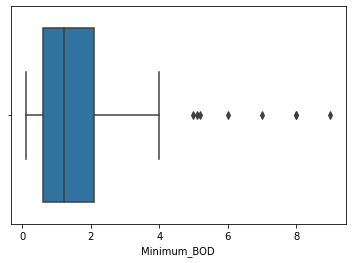

In [13]:
#As we can see, the maximum value of BOD is 206 which is an absolutely wrong value. To rectify this we will
#drop all rows having a BOD above 10. A BOD above 10 shows polluted water.
df = df[df['Minimum_BOD']<10]
sns.boxplot(df['Minimum_BOD'])

In [14]:
df["Minimum_BOD"] = df.groupby("State_Name").transform(lambda x: x.fillna(x.mean()))

In [15]:
df.Maximum_BOD.describe()

count    311.000000
mean       6.853055
std       18.212480
min        0.100000
25%        2.200000
50%        2.800000
75%        4.400000
max      258.600000
Name: Maximum_BOD, dtype: float64

/home/jyotbuch/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Maximum_BOD'>

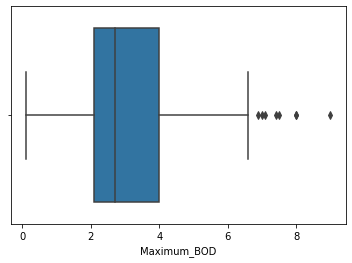

In [16]:
#As we can see, the maximum value of BOD is 258 which is an absolutely wrong value. To rectify this we will
#drop all rows having a BOD above 10. A BOD above 10 shows polluted water.
df = df[df['Maximum_BOD']<10]
sns.boxplot(df['Maximum_BOD'])

In [17]:
df["Maximum_BOD"] = df.groupby("State_Name").transform(lambda x: x.fillna(x.mean()))

#### Minimum and Maximum NITRATE N + NITRITE N (mg/l)

In [18]:
df.Minimum_NitrateN_and_NitriteN.describe()

count    262.000000
mean       0.245802
std        0.302702
min        0.010000
25%        0.030000
50%        0.135000
75%        0.337500
max        2.300000
Name: Minimum_NitrateN_and_NitriteN, dtype: float64

In [19]:
df["Minimum_NitrateN_and_NitriteN"] = df.groupby("State_Name").transform(lambda x: x.fillna(x.mean()))

In [20]:
df.Maximum_NitrateN_and_NitriteN.describe()

count    264.000000
mean       1.819848
std        7.016461
min        0.020000
25%        0.337500
50%        0.935000
75%        1.800000
max      111.280000
Name: Maximum_NitrateN_and_NitriteN, dtype: float64

/home/jyotbuch/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Maximum_NitrateN_and_NitriteN'>

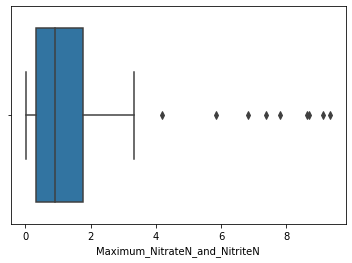

In [21]:
#As we can see, the maximum value of NITRATE N + NITRITE N  is 111 which is an absolutely wrong value. 
#To rectify this we will
#drop all rows having a Maximum NITRATE N + NITRITE N  above 10 as that is the maximum consumable limit.
df = df[df['Maximum_NitrateN_and_NitriteN']<10]
sns.boxplot(df['Maximum_NitrateN_and_NitriteN'])

#### Minimum and Maximum Dissolved O2

In [22]:
df.Minimum_DissolvedO2.describe()

count    258.000000
mean       5.445736
std        1.397608
min        0.800000
25%        4.600000
50%        5.800000
75%        6.400000
max       10.000000
Name: Minimum_DissolvedO2, dtype: float64

In [23]:
#In case of 

In [24]:
df.Maximum_DissolvedO2.describe()

count    258.000000
mean       7.698450
std        0.909225
min        4.800000
25%        7.200000
50%        7.700000
75%        8.100000
max       10.500000
Name: Maximum_DissolvedO2, dtype: float64

In [ ]:
#Since none of our missing values are more than 20%, we can fill all these values

#BOD is a measure of the amount of oxygen required to remove waste organic matter
#from water in the process of decomposition by aerobic bacteria. So we 